# __Árboles de Decisión__


In [2]:
import pandas as pd
import numpy as np
from IPython.display import Image
import lec7_graphs as afx
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('vertebrate.csv')
print(df.sample(5, random_state=11238))

          name  warm_blood  gives_birth  aquatic  aerial  has_legs  \
8          cat           1            1        0       0         1   
2       salmon           0            0        1       0         0   
3        whale           1            1        1       0         0   
1       python           0            0        0       0         0   
14  salamander           0            0        1       0         1   

    hibernates       class  
8            0     mammals  
2            0      fishes  
3            0     mammals  
1            1    reptiles  
14           1  amphibians  


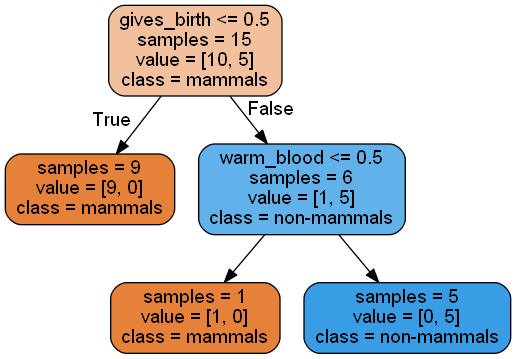

In [4]:
# recodificamos en mamiferos/no mamiferos
df['class'] = df['class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')
# guardamos los nombres de las clases en un nuevo objeto
store_y_labels = df['class'].unique()
# recodificamos de forma binaria
df['class'] = np.where(df['class'] == 'mammals', 1, 0)
# eliminamos atributos irrelevantes de la matriz de atributos
X_mat=df.drop(columns=['name', 'class'])
# Implementamos nuestra función y la guardamos en un nuevo objeto
dec_tree = afx.demo_classfication_tree(X_mat, df['class'], store_y_labels)
# renderizamos el objeto
Image(dec_tree.create_png())

## Análisis Exploratorio

In [5]:
df = pd.read_csv('cadata.csv', header=1).drop(columns='1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedianHouseValue  20640 non-null  float64
 1   MedianIncome      20640 non-null  float64
 2   MedianHouseAge    20640 non-null  float64
 3   TotalRooms        20640 non-null  float64
 4   TotalBedrooms     20640 non-null  float64
 5   Population        20640 non-null  float64
 6   Households        20640 non-null  float64
 7   Latitude          20640 non-null  float64
 8   Longitude         20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


<ipython-input-6-00f4574a12c8>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(cols, cols, index + 1)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-6-00f4574a12c8>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(cols, cols, index + 1)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `dis

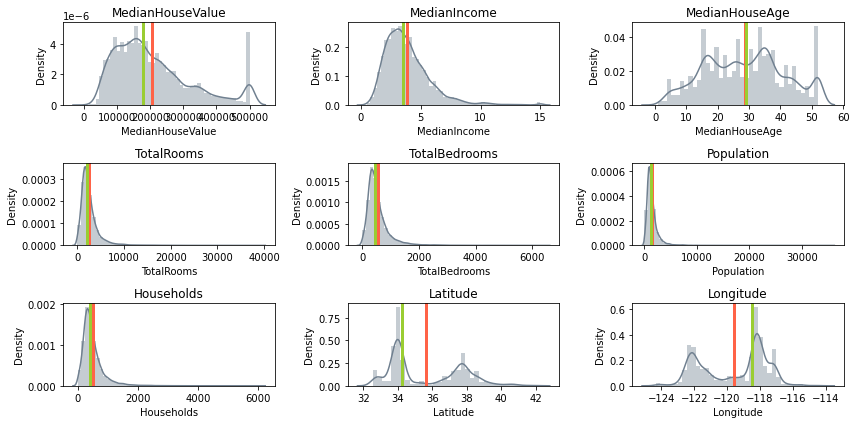

In [6]:
rows, cols = df.shape
cols = np.sqrt(cols)
plt.figure(figsize=(12, 6))
for index, (colname, serie) in enumerate(df.iteritems()):
    plt.subplot(cols, cols, index + 1)
    sns.distplot(serie, color='slategrey')
    plt.axvline(np.mean(serie), color='tomato', label = "media", lw=3)
    plt.axvline(np.median(serie), color='yellowgreen', label='mediana', lw=3)
    plt.title(colname)
plt.tight_layout()

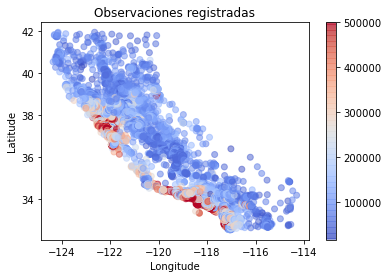

In [7]:
plt.scatter(df['Longitude'],
    df['Latitude'],
    c = df['MedianHouseValue'],
    cmap='coolwarm',
    alpha=.5)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Observaciones registradas')

## Árboles de Regresión

In [8]:
from sklearn.model_selection import train_test_split
# Vamos a trabajar con el logaritmo del vector para reducir no linealidad
df['log_MedianHouseValue'] = np.log(df['MedianHouseValue'])
# Sobreescribimos medianincome a log(medianincome)
df['log_MedianIncome'] = np.log(df['MedianIncome'])
# Definimos nuestro vector objetivo
y = df['log_MedianHouseValue']
# Definimos nuestra matriz de atributos y eliminamos irrelevantes
X = df.drop(columns=['MedianHouseValue', 'log_MedianHouseValue', 'MedianIncome'])
# Generamos muestras de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=11238)

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
# Implementamos nuestro modelo sin modificar hiperparametros
dec_tree = DecisionTreeRegressor().fit(X_train, y_train)
print("Test MSE:", mean_squared_error(y_test, dec_tree.predict(X_test)).round(5))
print("Test MAE:", median_absolute_error(y_test, dec_tree.predict(X_test)).round(5))
print("Test R2:", r2_score(y_test, dec_tree.predict(X_test)).round(5))

Test MSE: 0.10767
Test MAE: 0.15405
Test R2: 0.67298


## Análisis Máximo de profundidad en un AdD

Text(0, 0.5, 'Error Cuadrático Promedio')

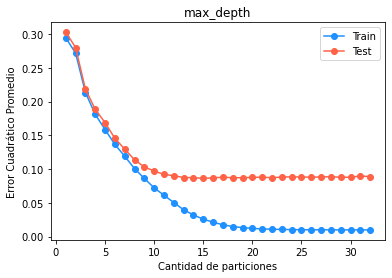

In [10]:
# generamos subconjuntos específicos para el problema de dos atributos
x_tr, x_te, y_tr, y_te = train_test_split(df.loc[:, ['Longitude', 'Latitude']], df['log_MedianHouseValue'], test_size=.33, random_state=11238)
# simulamos el desempeño en el rango del hiperparámetro
afx.train_test_over_params(DecisionTreeRegressor(), {'max_depth': np.linspace(1, 32, 32)}, x_tr, x_te, y_tr, y_te)
plt.xlabel('Cantidad de particiones')
plt.ylabel('Error Cuadrático Promedio')

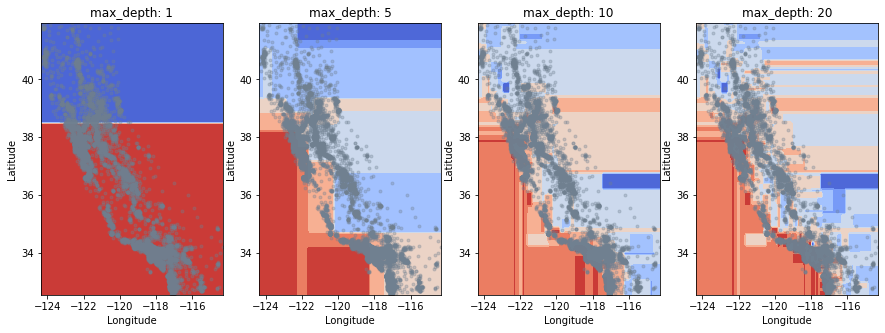

In [11]:
plt.figure(figsize=(15, 5))
# para cada valor predefinido del hiperparámetro
for index, value in enumerate([1, 5, 10, 20]):
    plt.subplot(1, 4, index + 1)
    # Implementamos un modelo con el ajuste específico
    tmp_model = DecisionTreeRegressor(max_depth=value)
    # Visualizamos la superficie de respuesta
    afx.plot_decision_function(tmp_model, df, 'Longitude', 'Latitude', 'log_MedianHouseValue',colorbar=False)
    plt.title("max_depth: {}".format(value))

## Análisis cantidad de atributos del modelo

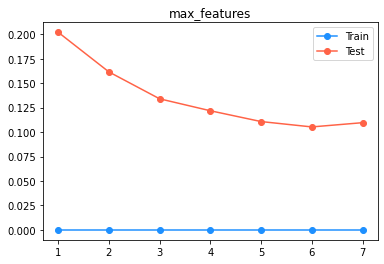

In [12]:
afx.train_test_over_params(DecisionTreeRegressor(), {'max_features': list(range(1,X_train.shape[1]))}, X_train, X_test, y_train, y_test)

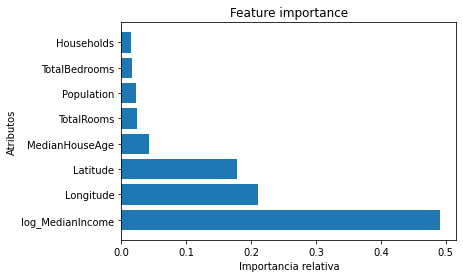

In [13]:
afx.plot_importance(dec_tree, X.columns)
plt.xlabel("Importancia relativa");
plt.ylabel('Atributos');

In [14]:
dec_tree.feature_importances_

array([0.04234994, 0.02433424, 0.01584563, 0.02319608, 0.01428833,
       0.17829247, 0.21006531, 0.49162799])

## Análisis Mínimo de nodos particionables en un árbol de decisión

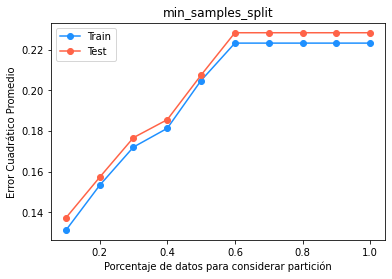

In [15]:
afx.train_test_over_params(DecisionTreeRegressor(), {'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)}, X_train, X_test, y_train, y_test)
plt.xlabel('Porcentaje de datos para considerar partición')
plt.ylabel('Error Cuadrático Promedio');

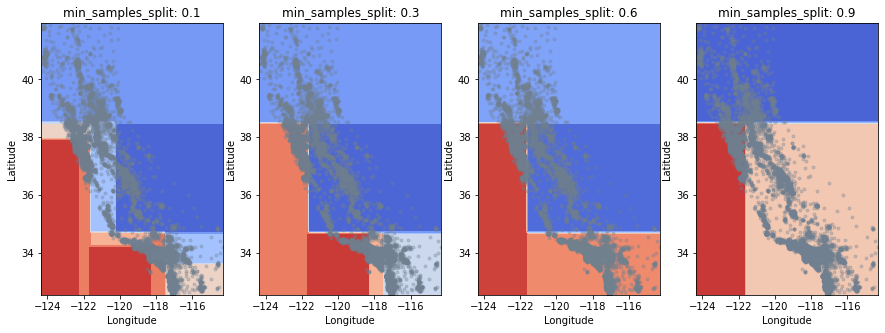

In [16]:
plt.figure(figsize=(15, 5))
for index, value in enumerate([0.1, 0.3,0.6, 0.9]):
    plt.subplot(1, 4, index + 1)
    tmp_model = DecisionTreeRegressor(min_samples_split=value)
    afx.plot_decision_function(tmp_model, df, 'Longitude', 'Latitude', 'log_MedianHouseValue', colorbar=False)
    plt.title("min_samples_split: {}".format(value))

## Análisis Mínimo de nodos terminales en un árbol de decisión

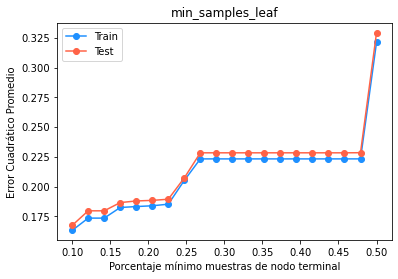

In [17]:
afx.train_test_over_params(DecisionTreeRegressor(), {'min_samples_leaf': np.linspace(0.1, 0.5, 20, endpoint=True)}, X_train, X_test, y_train, y_test)
plt.xlabel('Porcentaje mínimo muestras de nodo terminal')
plt.ylabel('Error Cuadrático Promedio');

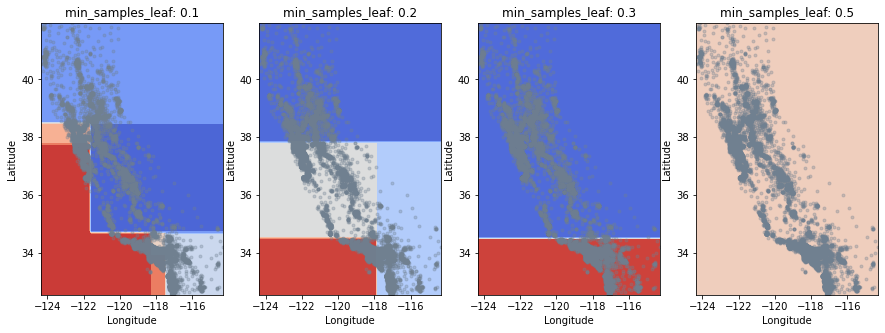

In [18]:
plt.figure(figsize=(15, 5))
for index, value in enumerate([0.1,.20, .3, 0.5]):
    plt.subplot(1, 4, index + 1)
    tmp_model = DecisionTreeRegressor(min_samples_leaf=value)
    afx.plot_decision_function(tmp_model, df, 'Longitude', 'Latitude', 'log_MedianHouseValue',colorbar=False)
    plt.title("min_samples_leaf: {}".format(value))

## Implementación Arbol de clasificación

In [19]:
from sklearn.tree import DecisionTreeClassifier
# Importamos la base de datos
df = pd.read_csv('voting.csv').drop(columns='Unnamed: 0')
print(df.sample(1, random_state=11238))


    region  population sex   age education   income  statusquo vote
206      N        3750   M  21.0         P  15000.0   -0.04558    N


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\

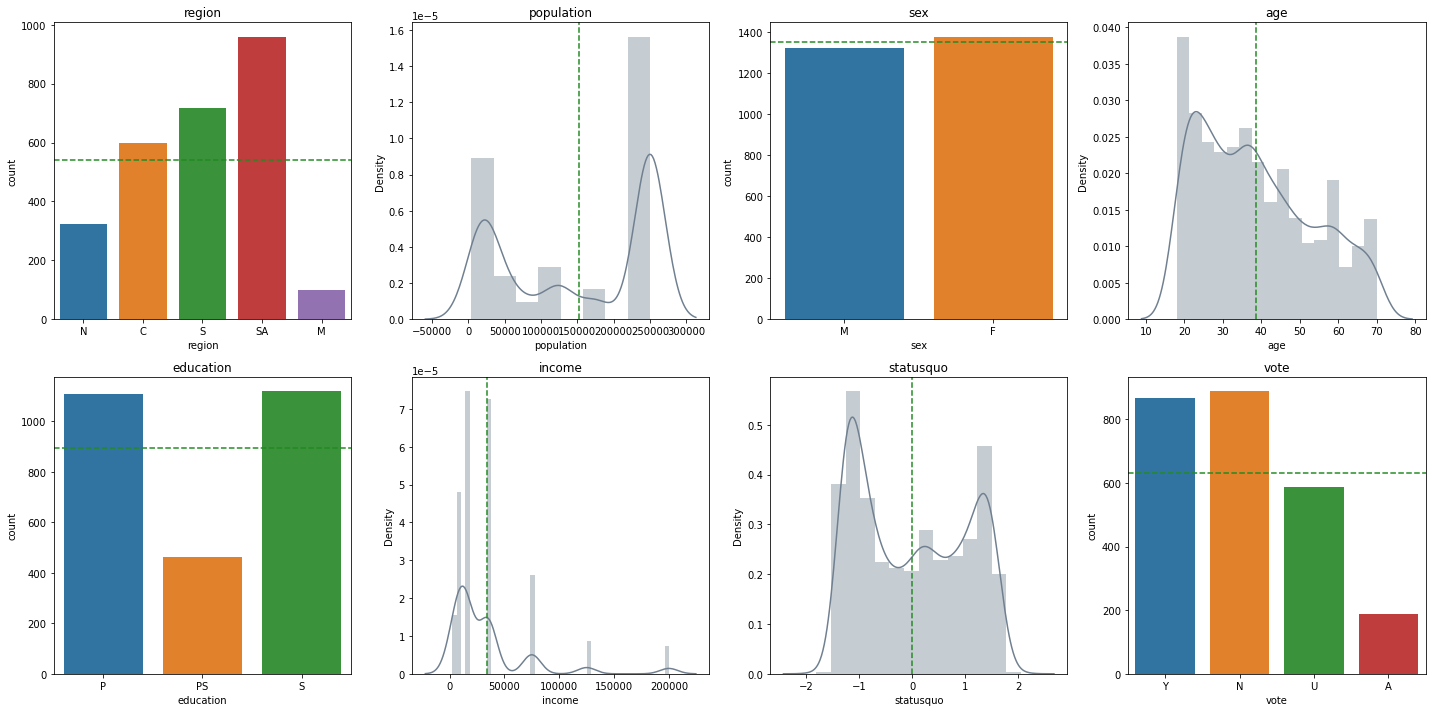

In [22]:
rows = 2
cols = df.shape[1] // rows
fig, ax = plt.subplots(rows, cols, figsize=(20, 10))
axes=ax.flatten()
for index, (colnames, serie) in enumerate(df.iteritems()):
    if serie.dtype == 'object':
        sns.countplot(serie.dropna(), ax=axes[index])
        axes[index].axhline(serie.value_counts().mean(), color='forestgreen', linestyle='--')
        axes[index].set_title(colnames)
    else:
        sns.distplot(serie.dropna(), color='slategrey', ax=axes[index])
        axes[index].axvline(serie.mean(), color='forestgreen', linestyle='--')
        axes[index].set_title(colnames)
plt.tight_layout()

In [23]:
# Vamos a binarizar cada variable categórica, ignorando la primera categoría de referencia
# Región del país
df = pd.concat([df, pd.get_dummies(df['region'], drop_first=True, prefix='region')], axis=1)
# Nivel educacional del encuestado
df = pd.concat([df, pd.get_dummies(df['education'], drop_first=True, prefix='ed')], axis=1)
# Sexo del encuestado
df = pd.concat([df, pd.get_dummies(df['sex'], drop_first=True, prefix='sex')], axis=1)
# Intención de voto
df = pd.concat([df, pd.get_dummies(df['vote'], drop_first=False, prefix='vote')], axis=1)
# Botamos las variables originales
df = df.drop(columns=['region', 'sex', 'education', 'vote'])
print(df.sample())


     population   age   income  statusquo  region_M  region_N  region_S  \
280       87500  29.0  15000.0   -1.23032         0         1         0   

     region_SA  ed_PS  ed_S  sex_M  vote_A  vote_N  vote_U  vote_Y  
280          0      1     0      0       0       1       0       0  


In [24]:
# Nos aseguramos de limpiar los datos perdidos
df = df.dropna()
# generamos las muestras definiendo la matriz de atributos
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, 'population':'sex_M'],
    # el vector objetivo
    df['vote_N'],
    # el tamaño de la muestra a dejar como validación
    test_size=.33,
    # definiendo la semilla pseudoaleatoria
    random_state=11238
)

In [25]:
# importamos la clase GridSearchCV
from sklearn.model_selection import GridSearchCV

In [31]:
%time
dec_tree_grid_cv = GridSearchCV(DecisionTreeClassifier(),
    # evaluamos 10 escenarios
    {'min_samples_split': np.linspace(0.1, 1.0, 10),
    # implementando 2 criterios de partición
    'criterion': ['gini', 'entropy'],
    # con una profundidad de ramas hasta 32
    'max_depth': np.linspace(1, 32, 32),
    # evaluando 10 escenarios
    'min_samples_leaf': np.linspace(0.1, 0.5, 10),
    # evaluando todos los atributos en la matriz
    'max_features': list(range(1,X_train.shape[1]))},
    # Con 5 validaciones cruzadas
    cv=5,
    # Ocupando todos los núcleos del computador
    n_jobs=-1
).fit(X_train, y_train)
%time

Wall time: 0 ns
Wall time: 0 ns


In [32]:
dec_tree_grid_cv.best_params_


{'criterion': 'gini',
 'max_depth': 23.0,
 'max_features': 8,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1}

In [33]:
dec_tree_grid_cv.best_score_


0.8311239193083573

In [34]:
dec_tree_grid_cv.best_estimator_.feature_importances_


array([8.66979537e-04, 7.33620980e-03, 0.00000000e+00, 9.91796811e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

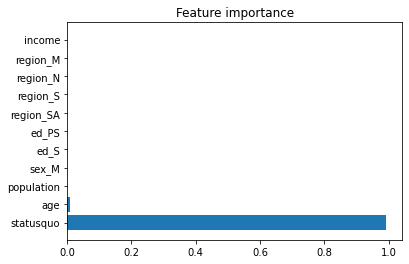

In [35]:
colnames = df.loc[:, 'population':'sex_M'].columns
afx.plot_importance(dec_tree_grid_cv.best_estimator_, colnames)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,
dec_tree_grid_cv.best_estimator_.predict(X_test)))


              precision    recall  f1-score   support

           0       0.92      0.78      0.84       572
           1       0.66      0.86      0.75       283

    accuracy                           0.81       855
   macro avg       0.79      0.82      0.79       855
weighted avg       0.83      0.81      0.81       855

